# Test 1 : Nonbreaking Wave Propagation Over a Horizontal Plane

## Case: 1 From the SWE Paper
### u_const = 0.4 $ \quad $  `Constant wave speed`
### n = 0.01 $ \quad $  `Manning's coefficient`

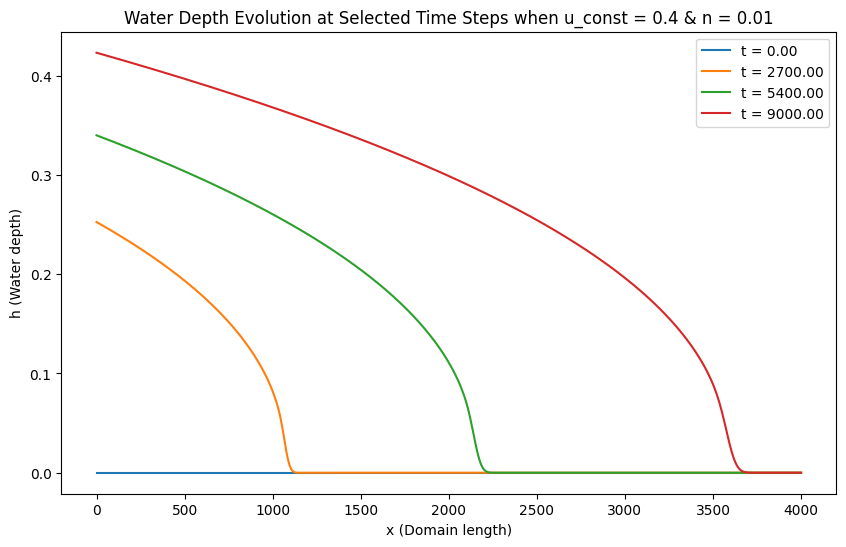

In [26]:
from dolfinx import mesh, fem
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI
from petsc4py import PETSc
from dolfinx.fem import Constant, locate_dofs_geometrical
from ufl import TrialFunction, TestFunction, dx, grad
from dolfinx.fem.petsc import LinearProblem

# Define parameters
Lx = 4000.0           # Domain length
nx = 500            # Number of elements
dt = 1           # Time step
T = 9000.0
num_steps = int(T / dt)     # Number of time steps
u_const = 0.4       # Constant wave speed
n = 0.01            # Manning's coefficient

# Create 1D mesh and define function space
domain = mesh.create_interval(MPI.COMM_WORLD, nx, [0, Lx])
V = fem.functionspace(domain, ("Lagrange", 1))

# Define initial condition and boundary condition function
h = fem.Function(V)           # Water depth function
h_prev = fem.Function(V)      # Previous time step for h

# Set initial condition (dry bed, so h = 0 initially)
h.interpolate(lambda x: np.zeros_like(x[0]))
# print(h.x.array)  # [0 0 0 ... 0]
# print(x)   # [   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200.
            # 2400. 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000. 4200. 4400. 4600.
            # 4800. 5000.]

# Define boundary condition at x=0 as a Constant
h_bc = Constant(domain, PETSc.ScalarType(0.0))

# Locate the dofs on the left boundary (x = 0)
dofs_left = locate_dofs_geometrical(V, lambda x: np.isclose(x[0], 0.0))
# print(dofs_left)   # [0]

# Initialize boundary condition
boundary_conditions = [fem.dirichletbc(h_bc, dofs_left, V)]
# print(boundary_conditions)

# Define variational form (weak form of the equation)
v = TestFunction(V)   # Test Function
h_trial = TrialFunction(V)  # Trial Function 
a = (h_trial / dt * v + u_const * h_trial.dx(0) * v) * dx  # Bilinear form
L = (h_prev / dt * v) * dx   # Linear Form

# Define boundary condition at x=0 based on Eq. (51) in SWE Paper
def upstream_bc(t):
    return ( (7/3) * n**2 * u_const**3 * t )**(3/7)

# Setup LinearProblem outside the loop
problem = LinearProblem(a, L, u=h, bcs=boundary_conditions)

# Time-stepping loop with plotting
# plot_steps = [0, num_steps // 4, num_steps // 2, 3 * num_steps // 4, num_steps]  # Steps to plot
plot_steps = [0, num_steps // (10/3) + 1, num_steps // (10/6) + 1, num_steps]  # Steps to plot
fig, ax = plt.subplots(figsize=(10, 6))

for step in range(num_steps+1):
    t = step * dt
    
    # Update boundary condition at x = 0
    h_bc.value = upstream_bc(t)
    
    # Solve the variational form
    h.x.array[:] = problem.solve().x.array[:]
    
    # Update previous solution
    h_prev.x.array[:] = h.x.array[:]

    # Plot h at selected steps
    if step in plot_steps:
        x = domain.geometry.x[:, 0]  # Extract x-coordinates from mesh
        # print(x)
        h_values = h.x.array
        ax.plot(x, h_values, label=f"t = {t:.2f}")
        
# Add labels and legend
ax.set_xlabel("x (Domain length)")
ax.set_ylabel("h (Water depth)")
ax.set_title("Water Depth Evolution at Selected Time Steps when u_const = 0.4 & n = 0.01")
ax.legend()
plt.show()

## Case: 2 From the SWE Paper
### u_const = 0.635 $ \quad $  `Constant wave speed`
### n = 0.005 $ \quad $  `Manning's coefficient`

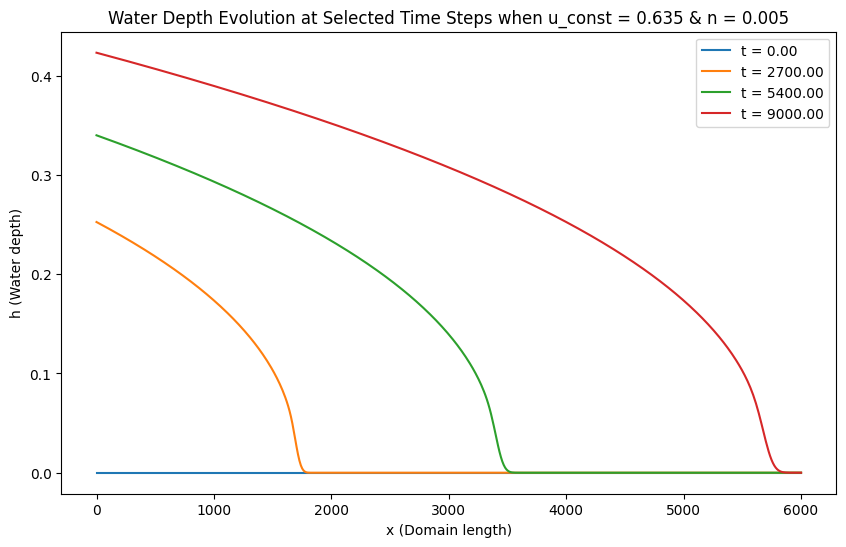

In [27]:
from dolfinx import mesh, fem
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI
from petsc4py import PETSc
from dolfinx.fem import Constant, locate_dofs_geometrical
from ufl import TrialFunction, TestFunction, dx, grad
from dolfinx.fem.petsc import LinearProblem

# Define parameters
Lx = 6000.0           # Domain length
nx = 500            # Number of elements
dt = 1           # Time step
T = 9000.0
num_steps = int(T / dt)     # Number of time steps
u_const = 0.635       # Constant wave speed
n = 0.005            # Manning's coefficient

# Create 1D mesh and define function space
domain = mesh.create_interval(MPI.COMM_WORLD, nx, [0, Lx])
V = fem.functionspace(domain, ("Lagrange", 1))

# Define initial condition and boundary condition function
h = fem.Function(V)           # Water depth function
h_prev = fem.Function(V)      # Previous time step for h

# Set initial condition (dry bed, so h = 0 initially)
h.interpolate(lambda x: np.zeros_like(x[0]))

# Define boundary condition at x=0 as a Constant
h_bc = Constant(domain, PETSc.ScalarType(0.0))

# Locate the dofs on the left boundary (x = 0)
dofs_left = locate_dofs_geometrical(V, lambda x: np.isclose(x[0], 0.0))

# Initialize boundary condition
boundary_conditions = [fem.dirichletbc(h_bc, dofs_left, V)]

# Define variational form (weak form of the equation)
v = TestFunction(V)   # Test Function
h_trial = TrialFunction(V)  # Trial Function 
a = (h_trial / dt * v + u_const * h_trial.dx(0) * v) * dx  # Bilinear form
L = (h_prev / dt * v) * dx   # Linear Form

# Define boundary condition at x=0 based on Eq. (51) in SWE Paper
def upstream_bc(t):
    return ( (7/3) * n**2 * u_const**3 * t )**(3/7)

# Setup LinearProblem outside the loop
problem = LinearProblem(a, L, u=h, bcs=boundary_conditions)

# Time-stepping loop with plotting
# plot_steps = [0, num_steps // 4, num_steps // 2, 3 * num_steps // 4, num_steps]  # Steps to plot
plot_steps = [0, num_steps // (10/3) + 1, num_steps // (10/6) + 1, num_steps]  # Steps to plot
fig, ax = plt.subplots(figsize=(10, 6))

for step in range(num_steps+1):
    t = step * dt
    
    # Update boundary condition at x = 0
    h_bc.value = upstream_bc(t)
    
    # Solve the variational form
    h.x.array[:] = problem.solve().x.array[:]
    
    # Update previous solution
    h_prev.x.array[:] = h.x.array[:]

    # Plot h at selected steps
    if step in plot_steps:
        x = domain.geometry.x[:, 0]  # Extract x-coordinates from mesh
        # print(x)
        h_values = h.x.array
        ax.plot(x, h_values, label=f"t = {t:.2f}")
        
# Add labels and legend
ax.set_xlabel("x (Domain length)")
ax.set_ylabel("h (Water depth)")
ax.set_title("Water Depth Evolution at Selected Time Steps when u_const = 0.635 & n = 0.005")
ax.legend()
plt.show()